# Load PAGES 2k

**load data from PAGES 2k** (https://www.nature.com/articles/sdata201788)

Source dataset can be downloaded from: https://doi.org/10.6084/m9.figshare.c.3285353.v2
This dataset is being updated via Feng Zhu's CFR package (https://fzhu2e.github.io/cfr/) to include the updated Palmyra record (Dee et al. 2020) in this notebook. See code below for further details.
 
Created 2023/08/01 by Lucie Luecke (LL)

Updated 24/10/2025 by LL: tidied up and streamlined for documentation and publication
27/11/2024 LL: Changed dD to d2H
21/11/2024 LL: added option to csv saving of compact dataframe, removed redundant output.
10/07/2024 LL: silenced certain sections, commented on code, added headers and plots

Here we extract a dataframe with the following columns:

  - 'archiveType'
  - 'climateInterpretation_variable'
  - 'climateInterpretation_variableDetail'
  - 'dataSetName'
  - 'geo_meanElev'
  - 'geo_meanLat'
  - 'geo_meanLon'
  - 'originalDataURL'
  - 'originalDatabase'
  - 'paleoData_TSid'
  - 'paleoData_notes'
  - 'paleoData_proxy'
  - 'paleoData_units'
  - 'paleoData_values'
  - 'paleoData_variableName'
  - 'year'
  - 'yearUnits'

We save a standardised compact dataframe for concatenation to DoD2k


## Set up working environment

Make sure the repo_root is added correctly, it should be: your_root_dir/dod2k
This should be the working directory throughout this notebook (and all other notebooks).

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
from pathlib import Path

# Add parent directory to path (works from any notebook in notebooks/)
# the repo_root should be the parent directory of the notebooks folder
init_dir = Path().resolve()
print(init_dir)
# Determine repo root
if init_dir.name == 'dod2k': repo_root = init_dir
elif init_dir.parent.name == 'dod2k': repo_root = init_dir.parent
elif init_dir.parent.parent.name == 'dod2k': repo_root = init_dir.parent.parent
else: raise Exception('Please review the repo root structure (see first cell).')

# Update cwd and path only if needed
if os.getcwd() != str(repo_root):
    os.chdir(repo_root)
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

print(f"Repo root: {repo_root}")
if str(os.getcwd())==str(repo_root):
    print(f"Working directory matches repo root. ")

/home/jupyter-lluecke/compile_proxy_database_v2.2/dod2k/data/pages2k
Repo root: /home/jupyter-lluecke/compile_proxy_database_v2.2/dod2k
Working directory matches repo root. 


In [2]:
import gzip
import pandas as pd
import numpy as np
import cfr

from dod2k_utilities import ut_functions as utf # contains utility functions
from dod2k_utilities import ut_plot as uplt # contains plotting functions

## load the source data

The pickle file has to be downloaded manually to the data/pages2k directory. We can then read it into a `pandas` dataframe

In [3]:
#%% read PAGES 2017 dataset from the pickle file (downloaded from figshare, see readme file)
pickled_PAGES = gzip.open('data/pages2k/PAGES2k_v2.0.0ts.pklz','r')
read_PAGES    = pd.read_pickle(pickled_PAGES)
df            = pd.DataFrame(read_PAGES) #converts into a DataFrame
print(df.columns.tolist()) # to see all 173 original columns of DataFrame
df.head()

['paleoData_TSid', 'pub1_author', 'pub1_title', 'paleoData_hasResolution', 'geo_pages2kRegion', 'paleoData_proxy', 'paleoData_hasMaxValue', 'pub2_author', 'paleoData_useInGlobalTemperatureAnalysis', 'paleoData_precededBy', 'year', 'paleoData_units', 'geo_country', 'paleoData_values', 'paleoData_hasMeanValue', 'paleoData_hasMinValue', 'paleoData_paleoMeasurementTableMD5', 'pub2_url', 'pub2_citeKey', 'pub2_Urldate', 'yearUnits', 'originalDataURL', 'pub1_citeKey', 'climateInterpretation_interpDirection', 'paleoData_variableName', 'paleoData_hasMedianValue', 'archiveType', 'geo_meanElev', 'chronData_df', 'tagMD5', 'googleDataURL', 'geo_meanLat', 'pub2_DOI', 'metadataMD5', 'dataSetName', 'paleoData_QCCertification', 'pub2_institution', 'paleoData_number', 'dataContributor', '@context', 'climateInterpretation_seasonality', 'climateInterpretation_variable', 'pub2_title', 'geo_type', 'geo_siteName', 'paleoData_pages2kID', 'pub1_pubYear', 'climateInterpretation_variableDetail', 'paleoData_senso

,paleoData_TSid,pub1_author,pub1_title,paleoData_hasResolution,geo_pages2kRegion,paleoData_proxy,paleoData_hasMaxValue,pub2_author,paleoData_useInGlobalTemperatureAnalysis,paleoData_precededBy,...,pub5_citeKey,pub4_publisher,pub6_citeKey,modernSystem_instrumentalDatasetCoordinates,pub1_year,geo_province,funding6_grant,paleoData_useInNAm2kHydro,funding5_agency,pub2_abstract
0,NAm_3004,NEEDS AUTHORS,NEEDS A TITLE!,"{'hasMedianValue': 1.0, 'hasMaxValue': 1.0, 'v...",NAm,TRW,2.194,"Graybill, D.A",TRUE,NAm-TR_105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LPD30c5b95c,"Newton, A. and Thunell, R. and Stott, L",Changes in the Indonesian Throughflow during t...,"{'hasMedianValue': -13.977272000000085, 'hasMa...",Ocean,foram Mg/Ca,29.540,"McGregor, Helen V. and Evans, Michael N. and G...",TRUE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NAm_3819,"Gajewski, K",Late holocene climate changes in eastern North...,"{'hasMedianValue': 17.5, 'hasMaxValue': 43.0, ...",NAm,pollen,20.600,NEEDS AUTHORS,TRUE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asia_221,"Cook, Edward R. and Krusic, Paul J. and Anchuk...",Tree-ring reconstructed summer temperature ano...,"{'hasMedianValue': 1.0, 'hasMaxValue': 1.0, 'v...",Asia,TRW,1.636,NEEDS AUTHORS,TRUE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Asia_153,"Cook, E. R. and Anchukaitis, K. J. and Buckley...",Asian Monsoon Failure and Megadrought During t...,"{'hasMedianValue': 1.0, 'hasMaxValue': 1.0, 'v...",Asia,TRW,1.983,NEEDS AUTHORS,TRUE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Update records using `cfr`. 

The following cells compare the PAGES2k data from figshare (used above and stored in df)
with another version provided by Feng Zhu's `cfr` environment, which  contains an updated record for Palmyra (Dee et al. 2020). The `cfr` documentation can be found here: https://fzhu2e.github.io/cfr/

**Important note: once the PAGES2k dataset has been officially updated with the updated record this process will be redundant! Please skip!!**

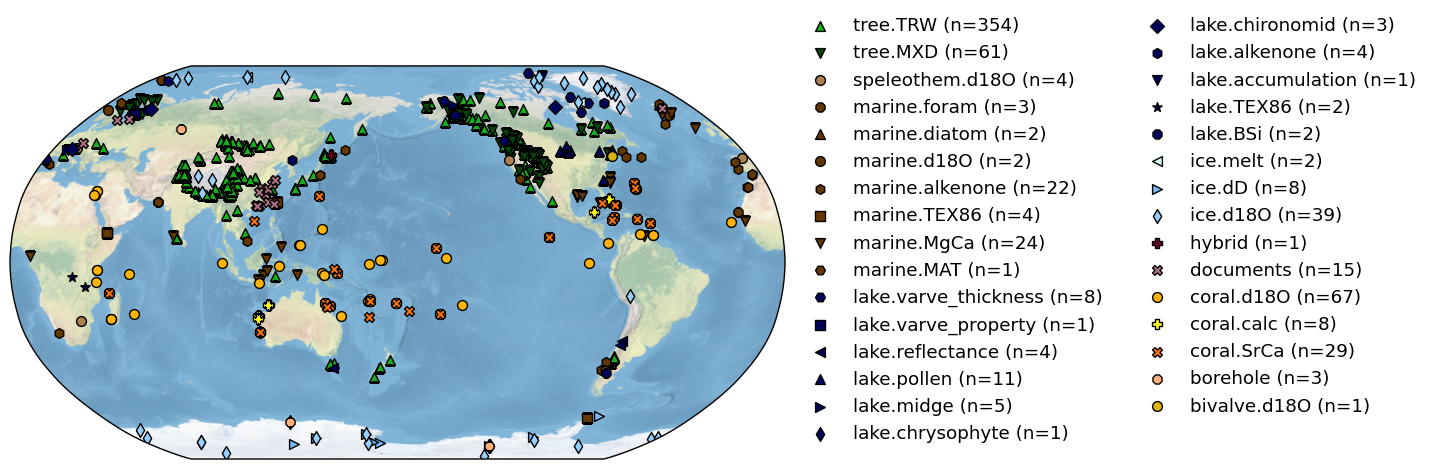

In [4]:
#%% ===========================================================================
# load data remotely from cfr
pdb    = cfr.ProxyDatabase().fetch('PAGES2kv2')  #cfr.ProxyDatabase().from_df(df)
df_cfr = pdb.to_df() # convert cfr object to pandas dataframe
#print(df_cfr.info())
# plot the ProxyDatabase object (similar to plot above)
fig, ax = pdb.plot()

### compare data from both databases and update main database

Go through all records in cfr's PAGES 2k database and figshare's PAGES 2k database and compare IDs:

In [5]:
#%% compare the data from cfr with the data from figshare

# check the pages ID's are all the same:
check_keys = []
for key in df['paleoData_pages2kID']:
    if key in df_cfr['pid'].values: 
        check_keys += [True]
    else:                    
        check_keys += [False]
if np.all(check_keys):
    print('Found all keys in the CFR version which are in the figshare version')
else:
    print('There are differences in the two databases!')
    

Found all keys in the CFR version which are in the figshare version


-------------
If the cell above ouputs
```
'Found all keys in the CFR version which are in the figshare version'
```
Then the IDs all match, meaning all records in cfr are in the published PAGES 2k database. 
However the Palmyra record is updated in cfr, which might not be the case for PAGES2k.

This is being investigated in the next cells:

In [6]:
#%% check for updated Palmyra record in the data downloaded from figshare (df)
rr, cc = np.where(df=='Palmyra')
palmyra = []
for record in rr:
    palmyra.append(df.iloc[record]['paleoData_pages2kID'])

Indeed, the `cfr` record includes an additional section for Ocn_103 (Palmyra). Not shown here.

Overwrite the data in the dataframe (but keep metadata)

In [7]:
index = df[df['paleoData_pages2kID']==palmyra[1]].index[0]
print(df[df['paleoData_pages2kID']==palmyra[1]].paleoData_pages2kID)
df.at[index, 'paleoData_values'] = df_cfr['value'][df_cfr['pid']==palmyra[1]].values[0]
df.at[index, 'year'] = df_cfr['time'][df_cfr['pid']==palmyra[1]].values[0]


483    Ocn_103
Name: paleoData_pages2kID, dtype: object


## create compact dataframe

### define compact dataframe and choose subset of columns 

Copy and paste all the columns in the pages dataframe.

Choose the relevant keys from the list:

In [8]:
list_of_vars = ['paleoData_TSid', # =  ID (unique identifier)
                #'paleoData_pages2kID', # = PAGES 2k ID (unique identifier)
                'paleoData_proxy', 'archiveType', # = proxy type and archive type
                'year', 'yearUnits', # = time and time units
                'paleoData_values', # the actual data
                'paleoData_units', # = data and data units
                #'geo_country', # = country
                'geo_siteName', # = site name
                'geo_meanElev', 'geo_meanLat', 'geo_meanLon', # = elevation, latitude and longitude (mean)
                #'climateInterpretation_seasonality', # = seasonal sensitivity
                'climateInterpretation_variable', # = all records are sensitive to T(emperature)
                'climateInterpretation_variableDetail', # = sensitive to e.g. air or sea surface
                #pub1_author',  'pub1_title', #'pub1_pubYear', 'pub1_year', 
                #'paleoData_hasResolution', #'geo_pages2kRegion', # not needed
                #'paleoData_hasMaxValue', 'paleoData_hasMeanValue', 'paleoData_hasMedianValue', 'paleoData_hasMinValue',# not needed
                # 'paleoData_useInGlobalTemperatureAnalysis', ???
                # 'paleoData_precededBy', # not needed
                 # 'paleoData_paleoMeasurementTableMD5', 'metadataMD5', #?????
                 #'pub2_author', 'pub2_url', 'pub2_citeKey', 'pub2_DOI', 'pub2_title', #'pub2_Urldate', 
                 'originalDataURL', #'pub1_citeKey', 
                 # 'climateInterpretation_interpDirection', 
                 # 'paleoData_variableName',#
                 # 'chronData_df', 'tagMD5', 'googleDataURL', ???
                 'dataSetName', # = name of original dataset?
                 # 'paleoData_QCCertification', #'pub2_institution', 
                 # 'paleoData_number', 'dataContributor',# '@context',
                  'paleoData_sensorSpecies',
                #'googleMetadataWorksheet',
                 # 'climateInterpretation_basis', 'pub2_type',
                 #'WDCPaleoUrl', #'googleSpreadSheetKey', 
                 # 'investigators', 'calibration_uncertaintyType',
                 # 'paleoData_ocean2kID', 'pub3_url', 'paleoData_inCompilation', 
                 # 'pub3_citeKey', 'studyName', 'chronData',
                 # 'calibration_uncertainty', 'notes', 
                 # 'paleoData_measurementMaterial',
                 # 'pub3_Urldate', 'pub1_publisher', 
                 #'paleoData_dataType', 
                 #'pub2_dataUrl', 'pub1_journal', 'pub2_pubYear', 
                 # 'LiPDVersion', 
                  #'geo_type',  ?
                 'paleoData_notes'#, 'pub2_publisher', 'paleoData_iso2kUI',
                 # 'paleoData_uncertainty', 'pub1_issue', 'depthUnits', 'pub3_author', 
                 # 'collectionName', 'paleoData_QCnotes', 'pub3_institution',
                 # 'pub2_issue', 'pub2_volume', 'funding1_agency', 'pub1_dataUrl',
                 # 'pub2_pages', 'pub1_pages', 'pub1_DOI', 'calibration_notes',
                 # 'pub2_journal', 'pub3_type', 'paleoData_measurementMethod', 
                 # 'pub1_volume', 'pub3_title', 'calibration_reference',
                 # 'calibration_equation', 'paleoData_description', 'pub1_type', 
                 #'geo_state', # not needed
                 #'ageUnits', 'age',  # majority nans
                 #'pub3_DOI', 
                # 'geo_ocean',  #'geo_region','geo_province', all NaNs??
                 # 'paleoData_sensorGenus', Nans?
                 #'paleoData_detail',# all NaNs:??
                 # 'funding1_grant', 'funding2_agency', 'funding2_grant', 
                 # 'pub1_link',
                 # 'pub1_institution', 'pub1_pubDataUrl', 'pub1_url', 'pub2_pubDataUrl', 
                 # 'funding3_agency', 'funding5_grant', 'funding4_grant', 
                 # 'funding3_grant', 'pub4_institution', 'pub4_url', 'pub4_type',
                 # 'pub3_pubYear', 'pub4_title', 'pub4_Urldate', 'pub4_author',
                 # 'pub4_citeKey', 'pub1_abstract',
                 #'ageMax', 'ageMaxUnits', 'ageMinUnits', 'ageMin',
                 # 'funding4_agency', 'pub6_author',
                 # 'pub3_dataUrl', 'pub5_author', 'pub6_type', 'pub5_pages', 
                 # 'pub5_volume', 'pub3_publisher', 'pub4_volume', 'pub5_type',
                 # 'pub4_DOI', 'pub5_publisher', 'pub5_pubYear', 'pub5_DOI',
                 # 'pub4_dataUrl', 'pub4_pages', 'pub6_title', 'pub3_volume',
                 # 'pub5_dataUrl', 'pub4_pubYear', 'pub3_journal', 'pub5_issue',
                 # 'pub6_Urldate', 'pub3_pages', 'pub5_title', 'pub4_journal',
                 # 'pub6_url', 'pub5_journal', 'pub6_institution', 'pub5_citeKey',
                 # 'pub4_publisher', 'pub6_citeKey', 
                 #'modernSystem_instrumentalDatasetCoordinates', 
                 #'funding6_grant', 'paleoData_useInNAm2kHydro', 
                 #'funding5_agency', 'pub2_abstract'
                ]

In [9]:
# create smaller dataframe with specific columns which we want to keep for the concatenated database
df_compact=df[list_of_vars]
print(df_compact.keys())

Index(['paleoData_TSid', 'paleoData_proxy', 'archiveType', 'year', 'yearUnits',
       'paleoData_values', 'paleoData_units', 'geo_siteName', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'climateInterpretation_variable',
       'climateInterpretation_variableDetail', 'originalDataURL',
       'dataSetName', 'paleoData_sensorSpecies', 'paleoData_notes'],
      dtype='object')


### rename columns and entries according to standard terminology

In [10]:
df_compact=df_compact.rename(columns={"paleoData_TSid": "datasetId"})
df_compact['originalDatabase'] = 'PAGES2k v2.0.0 (Ocn_103 updated with Dee et al. 2020)'
df_compact['yearUnits']        = 'CE'
print(df_compact.keys())

Index(['datasetId', 'paleoData_proxy', 'archiveType', 'year', 'yearUnits',
       'paleoData_values', 'paleoData_units', 'geo_siteName', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'climateInterpretation_variable',
       'climateInterpretation_variableDetail', 'originalDataURL',
       'dataSetName', 'paleoData_sensorSpecies', 'paleoData_notes',
       'originalDatabase'],
      dtype='object')


In [11]:
for ii in df_compact.index:
    year = np.array(df_compact.at[ii, 'year'], dtype=float)
    vals = np.array(df_compact.at[ii, 'paleoData_values'], dtype=float)
    df_compact.at[ii, 'year']             = year[year>=1]
    df_compact.at[ii, 'paleoData_values'] = vals[year>=1]

In [12]:
# rename certain proxy types to follow standard terminology
df_compact.loc[df_compact['paleoData_proxy']=='Coral Sr/Ca', 'paleoData_proxy']='Sr/Ca'
df_compact.loc[df_compact['paleoData_proxy']=='dD', 'paleoData_proxy']='d2H'
df_compact.loc[df_compact['paleoData_proxy']=='delta Density', 'paleoData_proxy']='MXD'
df_compact.loc[df_compact['paleoData_proxy']=='planktonic foraminifera', 'paleoData_proxy']='foraminifera'
print(np.sort(np.unique(df_compact['paleoData_proxy'].values)))

['BSi' 'Documentary' 'MXD' 'Sr/Ca' 'TEX86' 'TRW' 'alkenone' 'borehole'
 'calcification' 'calcification rate' 'chironomid' 'chrysophyte' 'd18O'
 'd2H' 'diatom' 'dynocist MAT' 'foram Mg/Ca' 'foram d18O' 'foraminifera'
 'historic' 'hybrid' 'melt' 'midge' 'pollen' 'reflectance'
 'sed accumulation' 'varve property' 'varve thickness']


In [13]:
# replace reference to 'this study' with proper DOI
df_compact.loc[df_compact['originalDataURL']=='this study', 'originalDataURL']='https://doi.org/10.6084/m9.figshare.c.3285353.v2'


In [14]:
# homogneise missing values for str columns
df_compact.loc[df_compact['paleoData_units']=='NA', 'paleoData_units']='N/A'
df_compact.loc[df_compact['paleoData_units']=='NaN', 'paleoData_units']='N/A'
df_compact.loc[df_compact['paleoData_units']=='NA', 'paleoData_units']='N/A'
df_compact.loc[df_compact['paleoData_units']=='NaN', 'paleoData_units']='N/A'



In [15]:
df['paleoData_sensorSpecies'] = df['paleoData_sensorSpecies'].map(lambda x: np.array(x, dtype = str))
df_compact.loc[df_compact['paleoData_sensorSpecies']=='NA', 'paleoData_sensorSpecies']='N/A'
df_compact.loc[pd.isnull(df_compact['paleoData_sensorSpecies']), 'paleoData_sensorSpecies']='N/A'

df_compact.loc[df_compact['paleoData_notes']=='NA', 'paleoData_notes']='N/A'
df_compact.loc[pd.isnull(df_compact['paleoData_notes']), 'paleoData_notes']='N/A'

In [16]:

df_compact.loc[df_compact['climateInterpretation_variable']=='T', 'climateInterpretation_variable']='temperature'

In [17]:
#  check that the datasetId is unique 
print(len(df_compact.datasetId.unique()))
print(len(df_compact))
# make datasetId unique by simply adding index number
df_compact.datasetId=df_compact.apply(lambda x: 'pages2k_'+x.datasetId, axis=1)
# check uniqueness - problem solved.
print(len(df_compact.datasetId.unique()))

692
692
692


In [18]:
# mask nans and exclude from dataframe
for ii in df_compact.index:
    dd=f.convert_to_nparray(df_compact.at[ii, 'paleoData_values'])
    df_compact.at[ii, 'paleoData_values']=dd.data[~dd.mask]
    df_compact.at[ii, 'year']=df_compact.at[ii, 'year'][~dd.mask]
    
drop_inds = []
for ii in range(df_compact.shape[0]):
    if len(df_compact.iloc[ii]['year'])==0:
        print('empty', ii, df_compact.iloc[ii]['year'], df_compact.iloc[ii]['originalDatabase'])
        print(df_compact.iloc[ii]['paleoData_values'])
        drop_inds += [df_compact.index[ii]]
        
for ii, row in enumerate(df_compact.paleoData_values):
    if np.std(row)==0: 
        print(ii, 'std=0')
    elif np.sum(np.diff(row)**2)==0: 
        print(ii, 'diff=0')
    elif np.isnan(np.std(row)):
        print(ii, 'std nan')
    else:
        continue
    if df.index[ii] not in drop_inds: 
        drop_inds += [df_compact.index[ii]]
    
print(drop_inds)
df_compact = df_compact.drop(index=drop_inds)

NameError: name 'f' is not defined

## save compact dataframe

In [ ]:
df_compact = df_compact[sorted(df_compact.columns)]
print(df_compact.info())

### save pickle

In [ ]:
# save to a pickle file (security: is it better to save to csv?)
# sort columns alphabetically (so they all appear in same order across the compact dataframes, for easy comparison)

df_compact.to_pickle('data/pages2k/pages2k_compact.pkl')

### save csv

In [ ]:
# save to a list of csv files (metadata, data, year)
df_compact.name='pages2k'
utf.write_compact_dataframe_to_csv(df_compact)

In [ ]:
# load dataframe
utf.load_compact_dataframe_from_csv('pages2k').info()

## Visualise dataframe

Show spatial distribution of records, show archive and proxy types

In [ ]:
# count archive types
archive_count = {}
for ii, at in enumerate(set(df['archiveType'])):
    archive_count[at] = df.loc[df['archiveType']==at, 'archiveType'].count()

sort = np.argsort([cc for cc in archive_count.values()])
archives_sorted = np.array([cc for cc in archive_count.keys()])[sort][::-1]

# Specify colour for each archive (smaller archives get grouped into the same colour)
archive_colour, major_archives, other_archives = uplt.get_archive_colours(archives_sorted, archive_count)

fig = uplt.plot_geo_archive_proxy(df, archive_colour)

Now plot the coverage over the Common Era

In [ ]:
fig = uplt.plot_coverage(df, archives_sorted, major_archives, other_archives, archive_colour)

## Display dataframe

### Display identification metadata: dataSetName, datasetId, originalDataURL, originalDatabase

#### index

In [ ]:
# # check index
print(df.index)

#### dataSetName (associated with each record, may not be unique)

In [ ]:
# # check dataSetName
key = 'dataSetName'
print('%s: '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))

#### datasetId (unique identifier, as given by original authors, includes original database token)

In [ ]:
# # check datasetId

print(len(df.datasetId.unique()))
print(len(df))
key = 'datasetId'
print('%s (starts with): '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))
print('datasetId starts with: ', np.unique([str(dd.split('_')[0]) for dd in df[key]]))

#### originalDataURL (URL/DOI of original published record where available)

In [ ]:
# originalDataURL
key = 'originalDataURL'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([kk for kk in df[key] if 'this' in kk]))
print(np.unique([str(type(dd)) for dd in df[key]]))
# 'this study' should point to the correct URL (PAGES2k)

#### originalDatabase (original database used as input for dataframe)

In [ ]:
# # originalDataSet
key = 'originalDatabase'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
# Note: the last two records have missing URLs

### geographical metadata: elevation, latitude, longitude, site name

#### geo_meanElev (mean elevation in m)

In [ ]:
# check Elevation
key = 'geo_meanElev'
print('%s: '%key)
print(df[key])
print(np.unique(['%d'%kk for kk in df[key] if np.isfinite(kk)]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### geo_meanLat (mean latitude in degrees N)

In [ ]:
# # Latitude
key = 'geo_meanLat'
print('%s: '%key)
print(np.unique(['%d'%kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))

### geo_meanLon (mean longitude)

In [ ]:
# # Longitude 
key = 'geo_meanLon'
print('%s: '%key)
print(np.unique(['%d'%kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### geo_siteName (name of collection site)

In [ ]:
# Site Name 
key = 'geo_siteName'
print('%s: '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))

### proxy metadata: archive type, proxy type, interpretation

#### archiveType (archive type)

In [ ]:
# archiveType
key = 'archiveType'
print('%s: '%key)
print(np.unique(df[key]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### paleoData_proxy (proxy type)

In [ ]:
# paleoData_proxy
key = 'paleoData_proxy'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### paleoData_sensorSpecies (further information on proxy type: species)

In [ ]:
# climate_interpretation
key = 'paleoData_sensorSpecies'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))


#### paleoData_notes (notes)

In [ ]:
# # paleoData_notes
key = 'paleoData_notes'
print('%s: '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))

#### climateInterpretation_variable (temperature or moisture sensitive?)

In [ ]:
# climate_interpretation
key = 'climateInterpretation_variable'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))


#### climateInterpretation_variableDetail (further details, as given by original authors or original database)

In [ ]:
# climate_interpretation
key = 'climateInterpretation_variableDetail'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))


#### climateInterpretation_direction (is record positively or negatively correlated with climate variable?)

In [ ]:
key = 'climateInterpretation_direction'

### data 

#### paleoData_values

In [ ]:
# # paleoData_values
key = 'paleoData_values'

print('%s: '%key)
for ii, vv in enumerate(df[key][:20]):
    try: 
        print('%-30s: %s -- %s'%(df['dataSetName'].iloc[ii][:30], str(np.nanmin(vv)), str(np.nanmax(vv))))
        print(type(vv))
    except: print(df['dataSetName'].iloc[ii], 'NaNs detected.')
print(np.unique([str(type(dd)) for dd in df[key]]))

#### paleoData_units

In [ ]:
# paleoData_units
key = 'paleoData_units'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### year

In [ ]:
# # year
key = 'year'
print('%s: '%key)
for ii, vv in enumerate(df[key][:20]):
    try: print('%-30s: %s -- %s'%(df['dataSetName'].iloc[ii][:30], str(np.nanmin(vv)), str(np.nanmax(vv))))
    except: print('NaNs detected.', vv)
print(np.unique([str(type(dd)) for dd in df[key]]))

#### yearUnits

In [ ]:
# yearUnits
key = 'yearUnits'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))

## Display dataframe

### Display identification metadata: dataSetName, datasetId, originalDataURL, originalDatabase

#### index

In [ ]:
# # check index
print(df.index)

#### dataSetName (associated with each record, may not be unique)

In [ ]:
# # check dataSetName
key = 'dataSetName'
print('%s: '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))

#### datasetId (unique identifier, as given by original authors, includes original database token)

In [ ]:
# # check datasetId

print(len(df.datasetId.unique()))
print(len(df))
key = 'datasetId'
print('%s (starts with): '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))
print('datasetId starts with: ', np.unique([str(dd.split('_')[0]) for dd in df[key]]))

#### originalDataURL (URL/DOI of original published record where available)

In [ ]:
# originalDataURL
key = 'originalDataURL'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([kk for kk in df[key] if 'this' in kk]))
print(np.unique([str(type(dd)) for dd in df[key]]))
# 'this study' should point to the correct URL (PAGES2k)

#### originalDatabase (original database used as input for dataframe)

In [ ]:
# # originalDataSet
key = 'originalDatabase'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
# Note: the last two records have missing URLs

### geographical metadata: elevation, latitude, longitude, site name

#### geo_meanElev (mean elevation in m)

In [ ]:
# check Elevation
key = 'geo_meanElev'
print('%s: '%key)
print(df[key])
print(np.unique(['%d'%kk for kk in df[key] if np.isfinite(kk)]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### geo_meanLat (mean latitude in degrees N)

In [ ]:
# # Latitude
key = 'geo_meanLat'
print('%s: '%key)
print(np.unique(['%d'%kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))

### geo_meanLon (mean longitude)

In [ ]:
# # Longitude 
key = 'geo_meanLon'
print('%s: '%key)
print(np.unique(['%d'%kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### geo_siteName (name of collection site)

In [ ]:
# Site Name 
key = 'geo_siteName'
print('%s: '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))

### proxy metadata: archive type, proxy type, interpretation

#### archiveType (archive type)

In [ ]:
# archiveType
key = 'archiveType'
print('%s: '%key)
print(np.unique(df[key]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### paleoData_proxy (proxy type)

In [ ]:
# paleoData_proxy
key = 'paleoData_proxy'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### paleoData_sensorSpecies (further information on proxy type: species)

In [ ]:
# climate_interpretation
key = 'paleoData_sensorSpecies'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))


#### paleoData_notes (notes)

In [ ]:
# # paleoData_notes
key = 'paleoData_notes'
print('%s: '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))

#### climateInterpretation_variable (temperature or moisture sensitive?)

In [ ]:
# climate_interpretation
key = 'climateInterpretation_variable'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))


#### climateInterpretation_variableDetail (further details, as given by original authors or original database)

In [ ]:
# climate_interpretation
key = 'climateInterpretation_variableDetail'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))


#### climateInterpretation_direction (is record positively or negatively correlated with climate variable?)

In [ ]:
key = 'climateInterpretation_direction'

### data 

#### paleoData_values

In [ ]:
# # paleoData_values
key = 'paleoData_values'

print('%s: '%key)
for ii, vv in enumerate(df[key][:20]):
    try: 
        print('%-30s: %s -- %s'%(df['dataSetName'].iloc[ii][:30], str(np.nanmin(vv)), str(np.nanmax(vv))))
        print(type(vv))
    except: print(df['dataSetName'].iloc[ii], 'NaNs detected.')
print(np.unique([str(type(dd)) for dd in df[key]]))

#### paleoData_units

In [ ]:
# paleoData_units
key = 'paleoData_units'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))

#### year

In [ ]:
# # year
key = 'year'
print('%s: '%key)
for ii, vv in enumerate(df[key][:20]):
    try: print('%-30s: %s -- %s'%(df['dataSetName'].iloc[ii][:30], str(np.nanmin(vv)), str(np.nanmax(vv))))
    except: print('NaNs detected.', vv)
print(np.unique([str(type(dd)) for dd in df[key]]))

#### yearUnits

In [ ]:
# yearUnits
key = 'yearUnits'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))